# Task 2

Task 2: You are free to find and define a problem (apply the discovery and define phases first, from the UK Design Council Double Diamond, 3.007 Design Thinking and Innovation) of your interest related to COVID-19. The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression, which means you can work with either continuous numerical data or classification.

The following technical/tool constraint applies: you are NOT allowed to use Neural Networks or other Machine Learning models. You must use Python and Jupyter Notebook.

In general, you may want to consider performing the following steps:
- Find an interesting problem which you want to solve either using **Linear Regression or Classification** (please check with your instructors first on whether the problem makes sense).
- Find a **dataset** to build your model. For example, you can use Kaggle (https://www.kaggle.com/datasets) to find suitable datasets.
- Use **plots** to visualize and understand your data.
- Create **training and test** data sets.
- Build your model.
- Choose an **appropriate metric** to evaluate your model (you may use the same metric as the one used in Task 1).
- Improve your model.

Problem: predict gold prices given covid
Effect of covid on economy

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data 
We use data from [Yahoo Finance](https://finance.yahoo.com/quote/GLD/history?period1=1479859200&period2=1637625600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true) 

In [25]:
df_gold_all = pd.read_csv('GLD.csv')
df = pd.read_csv('covid_data.csv')

# display(df_gold)
# display(df)


## Clean data

In [26]:
# Clean covid data by selecting only the relevant columns

df_subset = df.loc[((df['location']=='United States')| (df['location']=='China') | (df['location']=='Japan') | (df['location']=='Hong Kong') | (df['location']=='United Kingdom') | 
(df['location']=='Canada') | (df['location']=='India') | (df['location']=='Saudi Arabia') | (df['location']=='France') | (df['location']=='Germany') | 
(df['location']=='South Korea') | (df['location']=='Switzerland') | (df['location']=='Australia') | (df['location']=='Netherlands') |  
(df['location']=='Iran')| (df['location']=='Sweden')| (df['location']=='Brazil')| (df['location']=='Spain')|(df['location']=='Russia') |(df['location']=='Singapore')) ,:]


In [27]:
# Fill any NaN values
df_covid=df_subset.fillna(0)
# display(df_covid.index)

In [28]:
# Change the 'date' column to DateTime object
df_covid['Week']=pd.to_datetime(df_covid['date'])

# Group by week and then take the mean for the week
df_covid=df_covid.groupby(pd.Grouper(key='Week', freq="W-MON")).mean()

# Exclude the last week to match up with gold data
df_covid=df_covid.iloc[:95,:]
# display(df_covid)


In [29]:
# Clean Up of Gold Data frame
# change to standard date 

df_gold_all = pd.read_csv('GLD.csv')

# Change gold date range to same range as covid date range
df_gold=df_gold_all.copy()
df_gold=df_gold.loc[((df_gold['Date']> '2020-01-26') & (df_gold['Date']< '2021-11-17')) ,:]

# Change the date column to DateTime Index
df_gold['Date'] = pd.to_datetime(df_gold['Date']).dt.date

In [30]:
# Sync up the indexing for both df_gold and df_covid
df_covid=df_covid.reset_index()
df_gold=df_gold.reset_index()

# Merge into one data frame
frames=[df_gold,df_covid]
df_all = pd.concat(frames,axis=1)
# display(df_all)

# Remove duplicated/unecessary columns
df_all.drop(['index','Week'], axis=1, inplace=True)
# display(df_all)

In [31]:
# Clean covid data by selecting only the relevant columns
# split data into numerical and categorical set so that we can normalize the numerical set
columns_cat=['Date']
columns_num=['new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients','Open','High','Low','Close','Adj Close','Volume']

df_cat = df_all.loc[:,columns_cat]

df_num = df_all.loc[:,columns_num]

# display(df_num)

def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

df_num_norm = normalize_z(df_num)
stats = df_num_norm.describe()
# display(stats)

frames=[df_cat , df_num_norm]
result = pd.concat(frames,axis=1)
df_covid=result.fillna(0)
# display(df_covid.index)

In [32]:
# Clean covid data by selecting only the relevant columns
columns=['Date','new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients','Open','High','Low','Close','Adj Close','Volume']

df_cov_gold = df_all.loc[:,columns]
df_cov_gold=df_cov_gold.fillna(0)
# display(df_covid.index)

In [33]:
# display(df_cov_gold)

### Visualising data

In [34]:
# Clean covid data by selecting only the relevant columns
# split data into numerical and categorical set so that we can normalize the numerical set
columns_cat=['Date']
columns_num=['new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients','Open','High','Low','Close','Adj Close','Volume']

df_cat = df_all.loc[:,columns_cat]

df_num = df_all.loc[:,columns_num]

# display(df_num)

def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

df_num_norm = normalize_z(df_num)
stats = df_num_norm.describe()
# display(stats)

frames=[df_cat , df_num_norm]
df_visual = pd.concat(frames,axis=1)
df_visual=df_visual.fillna(0)


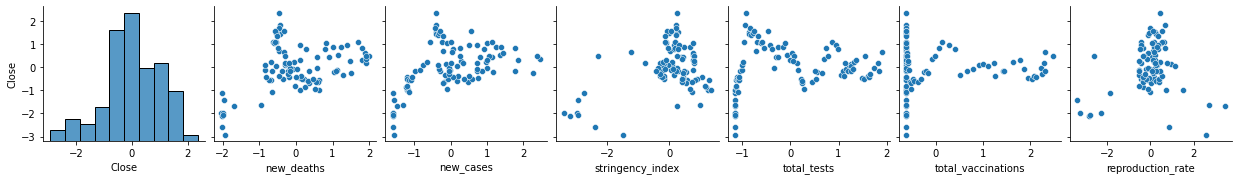

In [35]:
myplot = sns.pairplot(data=df_visual, x_vars=['Close','new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate'],y_vars=['Close'])

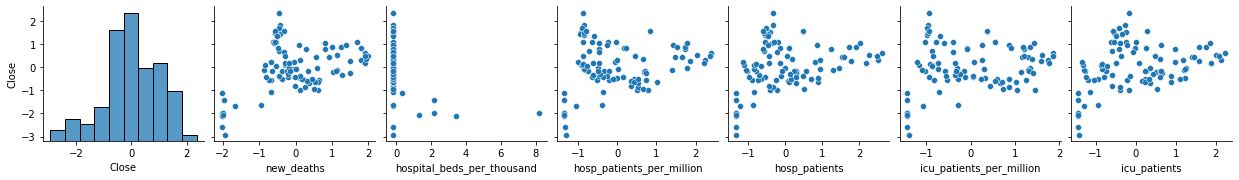

In [36]:
myplot = sns.pairplot(data=df_visual, x_vars=['Close','new_deaths','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients'],y_vars=['Close'])

### Train model

In [37]:
def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature=df.loc[:,feature_names]
    df_target=df.loc[:,target_names]
    return df_feature, df_target

def compute_cost(X, y, beta):
    J = 0
    #calculate m, no of rows/data pt
    m = X.shape[0]
    
    #calculate yp, predicted target value from X and beta
    yp = np.matmul(X, beta)
    
    #calculate the error
    error = yp-y
    
    #calculate the cost
    J = (1/(2*m))*np.matmul(error.T, error)
    J= J[0][0] #to get the float
    return J

def prepare_feature(df_feature):
    #numpy is just arrays
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0],1))
    X = np.concatenate((array1, feature), axis = 1)
    return X

def prepare_target(df_target):
    return df_target.to_numpy() 

def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from shape of X or y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)

    #for the number of iterations
    for n in range(num_iters):
        #--> compute the predicted y
        yp = np.matmul(X, beta)
        
        #--> compute the error
        error = yp - y
        
        #--> compute the new beta
        beta = beta - (alpha/m)*np.matmul(X.T, error)
        
        #--> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    X = prepare_feature(df_feature)
    yp = predict_norm(X, beta)
    return yp

def mean_squared_error(target, pred):
    n=target.shape[0]
    error=target-pred
    mse=(1/n)*np.sum(error**2)
    return mse

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indices=df_target.index

    if random_state!=None:
        np.random.seed(random_state)
    
    num_rows=len(indices)
    k = int(test_size * num_rows)
    test_indices=np.random.choice(indices,k,replace=False)

    indices=set(indices)
    test_indices=set(test_indices)
    train_indices=indices-test_indices
    
    df_feature_train=df_feature.loc[train_indices,:]
    df_feature_test=df_feature.loc[test_indices,:]
    df_target_train=df_target.loc[train_indices,:]
    df_target_test=df_target.loc[test_indices,:]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y, ypred):
    # calculate ssres
    diff = y - ypred
    ssres = np.matmul(diff.T, diff)[0][0]
    
    # calculate sstot
    ymean=np.mean(y)
    diff_mean=y-ymean #element wise subtraction
    sstot= np.matmul(diff_mean.T, diff_mean)[0][0]
    
    # calcuate r2
    return 1-(ssres/sstot)

def adj_r2_score(X,y,ypred):
    r2=r2_score(y, ypred)
    adj_r2=1 - ((1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
    return adj_r2

In [38]:
# Get features and targets from data frame
features=['new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_feature, df_target = get_features_targets(df_cov_gold, features, ['Close'])

# Split into training and test data set
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

# Normalize train features
df_features_train_z=normalize_z(df_features_train)

X = prepare_feature(df_features_train_z)
m=X.shape[1]
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((m,1))

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)



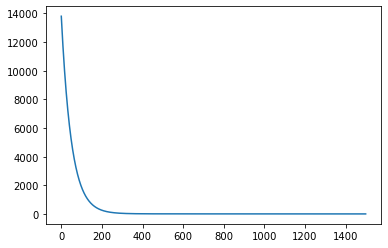

In [39]:
plt.plot(J_storage)

In [40]:
# call the predict method to get the predicted values
target = prepare_target(df_target_test)
pred = predict(df_features_test, beta)
with np.printoptions(threshold=np.inf):
    print(beta)

[[167.59532555]
 [  3.27480948]
 [  6.15421778]
 [  3.88627622]
 [ -1.50507384]
 [ -0.83803454]
 [ -1.93104515]
 [ -1.48844009]
 [ -2.25722964]
 [  2.92575393]
 [ -9.09312879]
 [  2.24138987]]


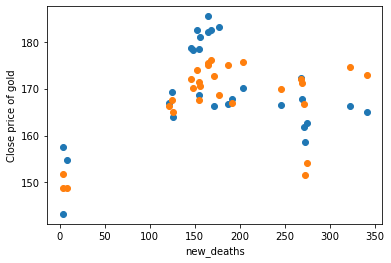

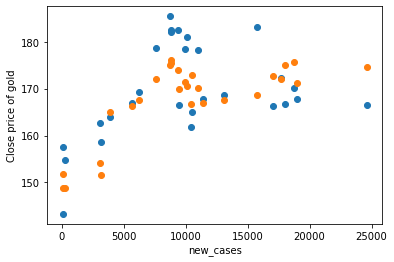

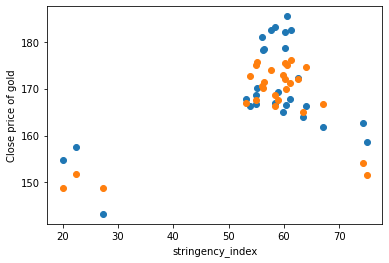

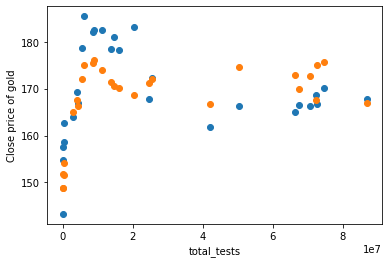

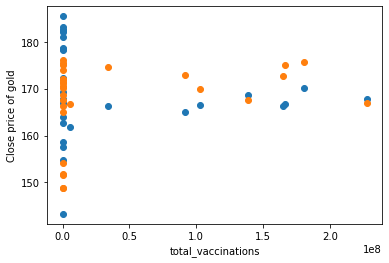

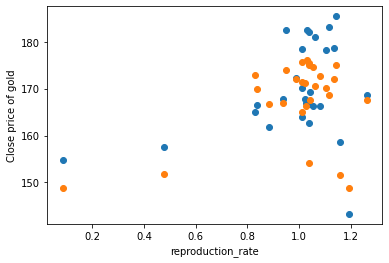

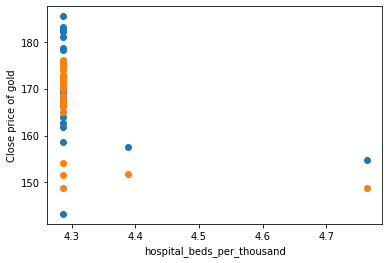

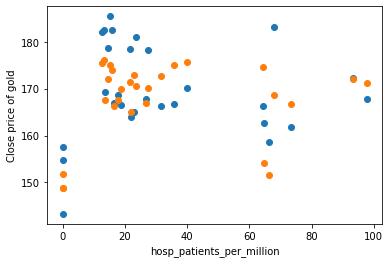

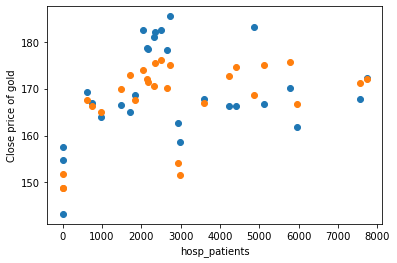

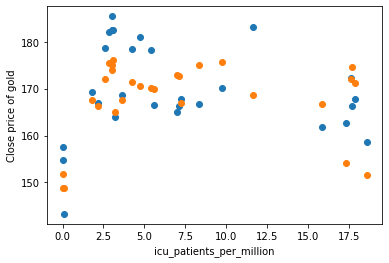

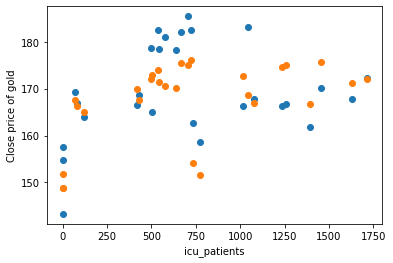

In [41]:
features=['new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

for i in range(len(features)):
    ft=features[i]
    plt.figure(i)
    plt.scatter(df_features_test[ft],target)
    plt.scatter(df_features_test[ft],pred)
    plt.xlabel(ft)
    plt.ylabel('Close price of gold')

### Evaluate model

In [42]:
mse=mean_squared_error(target,pred)
print('MSE: ',mse)

rse=np.sqrt(mse/(X.shape[0]-m-1))
print('RSE: ',rse)

r2=r2_score(target, pred)
print('r2: ',r2)

adj_r2=adj_r2_score(X,target,pred)
print('adjusted r2: ',adj_r2)

MSE:  46.31647356235523
RSE:  0.9261276766067131
r2:  0.5190818196831619
adjusted r2:  0.4122111129460868


In [135]:
# #r2_1
# r2_1 = r2_score(target,pred)
# print("r2_1",r2_1)
# #adj_r2_1
# X, y = df_features_test, df_target_test
# adj_r2_1 = 1 - (1-r2_1)*(len(y)-1)/(len(y)-X.shape[1]-1)
# print("adj_r2_1",adj_r2_1)

r2_1 0.5464466534249506
adj_r2_1 0.23462872765460407


# Add polynomial regression

In [140]:
def transform_features(df_feature, colname, colname_transformed,power):
    df_out=df_feature.copy()
    for i in range(1,power):
        df_out.loc[:,colname_transformed+str(i)]=df_feature[colname]**i 
    return df_out

In [43]:
# display(df_covid)

In [147]:
features=['new_deaths', 'new_cases', 'stringency_index', 'total_tests', 'icu_patients_per_million', 'icu_patients']

all={}
mse_all=[]
for i in range(1,5):
    print(f"Power: {i}")
    df_feature, df_target = get_features_targets(df_covid, features, ['Close'])
    #df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^",i)
    #df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^",i)
    df_feature = transform_features(df_feature, "icu_patients", "icu_patients^",i)
    df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^",i)
    
    df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)
    
    X = prepare_feature(df_features_train)
    # print(X)
    m=X.shape[1]
    target = prepare_target(df_target_train)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((m,1))

    # call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

    # call the predict method to get the predicted values
    pred = predict(df_features_test, beta)
    print(pred.shape)
    all[i]=pred

    #collect evaluation metric
    actual=prepare_target(df_target_test)
    mse2=mean_squared_error(actual,pred)
    print("mse",mse2)
    mse_all.append(mse2)
    
    #r_2
    r_2 = r2_score(actual,pred)
    print("r2",r_2)
    X, y = df_features_test, df_target_test
    adj_r_2 = 1 - (1-r_2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("adj_r2",adj_r_2)
    print("_" * 10)
    


# print(all)
print(df_feature)


Power: 1
(28, 1)
mse 0.5054295206863885
r2 0.5166348640706526
adj_r2 0.3785305395194105
__________
Power: 2
(28, 1)
mse 0.4828241790810406
r2 0.5382533757930379
adj_r2 0.3438337445480012
__________
Power: 3
(28, 1)
mse 0.37914963694783865
r2 0.6374020347051121
adj_r2 0.42410911394341344
__________
Power: 4
(28, 1)
mse 0.360426944106062
r2 0.655307393612797
adj_r2 0.3795533085030346
__________
    new_deaths  new_cases  stringency_index  total_tests  \
0    -2.029442  -1.599602         -3.397725    -1.146322   
1    -2.006215  -1.580816         -3.211582    -1.146321   
2    -1.989245  -1.577233         -2.970601    -1.146319   
3    -1.964394  -1.567463         -2.938939    -1.146308   
4    -1.977671  -1.599782         -2.922941    -1.146286   
..         ...        ...               ...          ...   
90   -0.172692  -0.039062         -0.348146     1.732545   
91   -0.156986  -0.036934         -0.418922     1.834194   
92   -0.184489   0.000449         -0.765111     1.818474   
93  

Text(0, 0.5, 'Mean squared error')

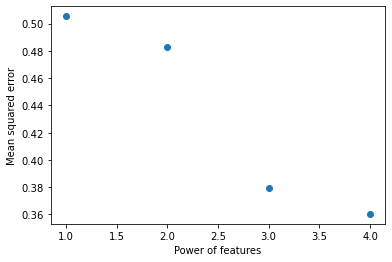

In [145]:
power=list(range(1,5))
plt.figure(6)
plt.scatter(power,mse_all)
plt.xlabel('Power of features')
plt.ylabel('Mean squared error')

In [146]:
# ERROR
# features=['hospital_beds_per_thousand','hosp_patients_per_million',
#          'hosp_patients','icu_patients_per_million','icu_patients']

# for power in range(2,5):
#     pred=all[power]
#     df_feature, df_target = get_features_targets(df_covid, features, ['Close'])
#     df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^",i)
#     df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^",i)
#     df_feature = transform_features(df_feature, "icu_patients", "icu_patients^",i)
#     df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^",i)
    

#     for x in range(len(features)):
#         ft=features[x]
#         plt.figure(x)
#         plt.scatter(df_feature[ft+'^'+str(power)],target)
#         plt.scatter(df_feature[ft+'^'+str(power)],pred)
#         plt.xlabel(ft+str(power))
#         plt.ylabel('close price of gold')
        

In [ ]:
import itertools

def evalue_models_with_diff_feature_combinations(features):
    #1 get all different combinations of features
    store_evaluations = []
    for L in range(0, len(features)+1):
        #2 for each combination, run model, print combination, r2 and adj_r2
        for features_subset in itertools.combinations(features, L):
            features_list = [*features_subset]
            if features_list == []:
                continue
            #run base model
            df_feature, df_target = get_features_targets(df_covid, features_list, ['Close'])
            df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

            X = prepare_feature(df_features_train)
            m=X.shape[1]
            target = prepare_target(df_target_train)

            iterations = 1500
            alpha = 0.01
            beta = np.zeros((m,1))

            # call the gradient_descent function
            beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

            target = prepare_target(df_target_test)
            pred = predict(df_features_test, beta)

            mse1=mean_squared_error(target,pred)
            
            r2_1 = r2_score(target,pred)
            
            #adj_r2_1
            X, y = df_features_test, df_target_test
            adj_r2_1 = 1 - (1-r2_1)*(len(y)-1)/(len(y)-X.shape[1]-1)
            
            
            print('―' * 10)
            print(f"feature combination: {features_subset}")
            print(f"mse {mse1}")
            print("r2_1",r2_1)
            print("adj_r2_1",adj_r2_1)
            print('―' * 10)
            
            store_evaluations.append([features_subset,mse1,r2_1,adj_r2_1])
    #print max 
    print('―' * 10)
    print('―' * 10)
    print('―' * 10)
    
    best_fit = max(store_evaluations, key=lambda x: x[3])
    print(f"best_fit combination:", best_fit[0])
    print(f"best_fit mse:", best_fit[1])
    print(f"best_fit r2_1:", best_fit[2])
    print(f"best_fit adj_r2_1:", best_fit[3])
    return None    

In [ ]:
features=['new_deaths', 'new_cases',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

evalue_models_with_diff_feature_combinations(features)


――――――――――
feature combination: ('new_deaths',)
mse 1.1768332438192115
r2_1 -0.12545891678892507
adj_r2_1 -0.1687457982038838
――――――――――
――――――――――
feature combination: ('new_cases',)
mse 0.9984569376958842
r2_1 0.04513042144123347
adj_r2_1 0.008404668419742523
――――――――――
――――――――――
feature combination: ('stringency_index',)
mse 0.907985520375326
r2_1 0.13165233427189826
adj_r2_1 0.09825434712850978
――――――――――
――――――――――
feature combination: ('total_tests',)
mse 1.1791013433451107
r2_1 -0.12762800306261268
adj_r2_1 -0.1709983108727131
――――――――――
――――――――――
feature combination: ('total_vaccinations',)
mse 1.105242495390044
r2_1 -0.056993442515173465
adj_r2_1 -0.09764703645806483
――――――――――
――――――――――
feature combination: ('reproduction_rate',)
mse 1.0430548001341198
r2_1 0.0024794662490221775
adj_r2_1 -0.035886708126015465
――――――――――
――――――――――
feature combination: ('hospital_beds_per_thousand',)
mse 0.9639924356374072
r2_1 0.07809038527478562
adj_r2_1 0.04263232316996968
――――――――――
―――